# Unspervised Learning (비지도 학습)
- **정답이 없는** 데이터를 통해 데이터의 유의미한 패턴/구조 발견  
- Clustering : 유사한 특징을 가지는 데이터들을 그룹화  
example) 고객 세분화, 소셜 네트워크 분석, 기사 그룹 분류

---

## K-Means
데이터를 K개의 클러스터(그룹)로 군집화하는 알고리즘,  
각 데이터로부터 이들이 속한 클러스터의 중심점(Centroid)까지의 평균 거리를 계산  

#### 동작순서
1. K 값 설정  
1. **지정된 K개 만큼의 랜덤 좌표 설정**
1. 모든 데이터로부터 가장 가까운 중심점 선택  
1. 데이터들의 평균 중심으로 중심점 이동  
1. 중심점이 더 이상 이동되지 않을 때까지 반복  

---

**Random Initialization Trap** : (중심점) 무작위 선정 문제  
좌표를 랜덤으로 설정하기 때문에 분석을 여러번 하는 경우 분석 결과가 달라질 수 있음  

---

## K-Mean++
1. **데이터 중**에 랜덤으로 1개를 중심점으로 선택  
1. 나머지 데이터로부터 중심점까지의 거리 계산  
1. 중심점과 가장 먼 지점의 데이터를 다음 중심점으로 선택  
1. 중심점이 K개가 될 때가지 반복  
1. K-Means 전통적인 방식으로 진행 

---

## Optimal K (최적의 K)
### Elbow Method (엘보우 방법)
1. K 변화에 따른 중심점까지의 평균 거리 비교 
1. 경사가 완만해지는 지점의 K선정 

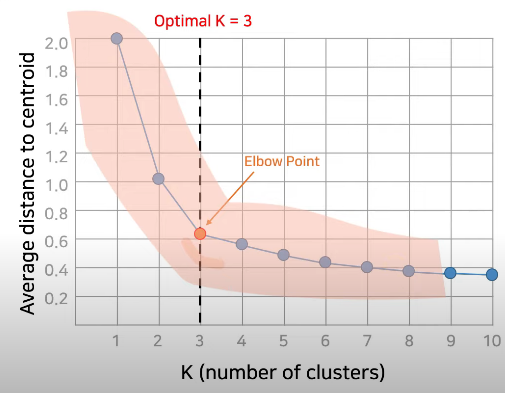

---

## 유사도
### Euclidean Distance (유클리드 거리) - K-Means에서는 유클리드 거리를 사용
$d=\sqrt{(x_2-x_1)^2 + (y_2-1y_1)^2}$  
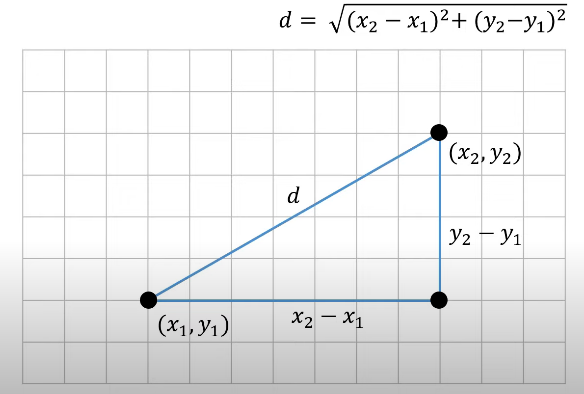

**두 지점간의 직선 거리**

---

### Manhattan Distance (맨해튼 거리)
$d=|x_2-x_1| + |y_2-y_1|$  
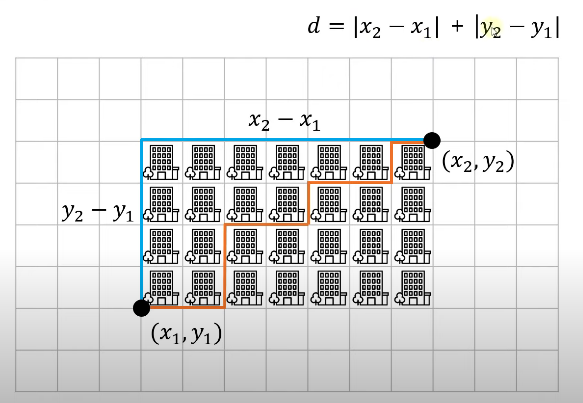  

---

### Cosine Similarity (코사인 유사도)
**데이터간의 각도를 보는 것**  

$\cos0^{\circ} = 1$  
$\cos30^{\circ} = \frac{\sqrt{3}}{2}$  
$\cos60^{\circ} = \frac{1}{2}$  
$\cos90^{\circ} = 0$  

각도가 작을 수록 더 값이 큰, 유사도가 높다고 볼 수 있다.  

$similarity=\cos(\theta)=\frac{A \cdot B}{||A||||B||}$
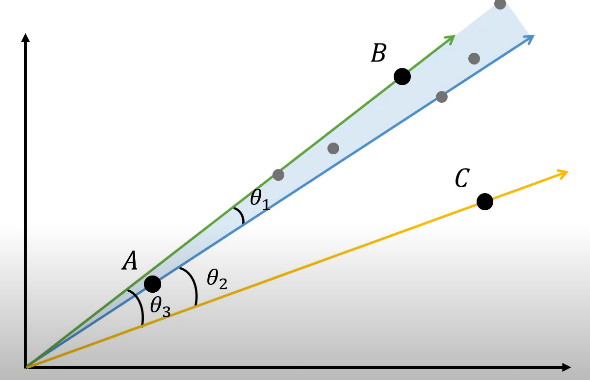

A하고 B사이의 면적을 그리고 이 사이에 데이터가 있는 경우 유사도가 높다고 판단할 수 있다.  


# 5. K-Means

In [1]:
import os
os.environ['OMP_NUM_THREADS']='1' # elbow method할 때 에러뜨는 경우
# import StandardScaler 이전에 실행이 되어야 한다. (스케일링)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('KMeansData.csv')

In [4]:
dataset.head()

,hour,score
0,7.33,73
1,3.71,55
2,3.43,55
3,3.06,89
4,3.33,79


In [5]:
# 비지도 학습이기 때문에 종속 변수가 없다.
X = dataset.iloc[:, :].values
# X = dataset.values 위와 동일
# X = dataset.to_numpy() # 공식 홈페이지 권장
X[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

### 데이터 시각화 (전체 데이터 분포 확인)

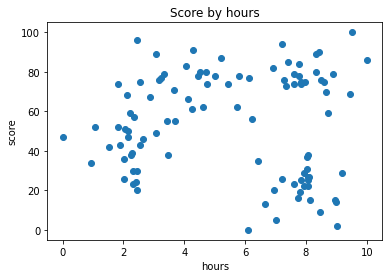

In [6]:
plt.scatter(X[:, 0], X[:, 1]) # x 축 : hour / y 축 :score
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 데이터 시각화 (축 범위 통일)

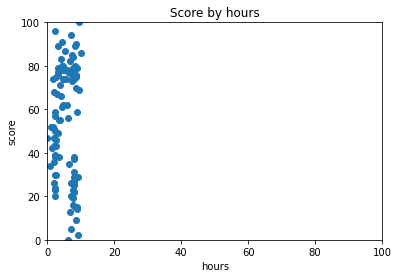

In [7]:
plt.scatter(X[:, 0], X[:, 1]) # x 축 : hour / y 축 :score
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

### 피처 스케일링  (Feature Scaling)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X) # X data에 대해서 스케일링
X[:5]

array([[ 0.68729921,  0.73538376],
       [-0.66687438,  0.04198891],
       [-0.77161709,  0.04198891],
       [-0.9100271 ,  1.35173473],
       [-0.8090252 ,  0.96651537]])

### 데이터 시각화 (스케일링 된 데이터)

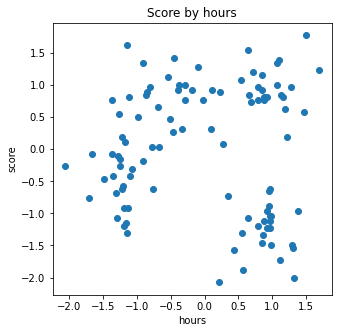

In [9]:
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1])
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

# 실제 데이터로만 봤을 때는 거리에 대한 괴리가 있을 수 있기 때문에 스케일링하여 각 데이터의 거리를 통일 시키는 작업으로 이해

### 최적의 K 값 찾기 (엘보우 방식 Elobow Method)

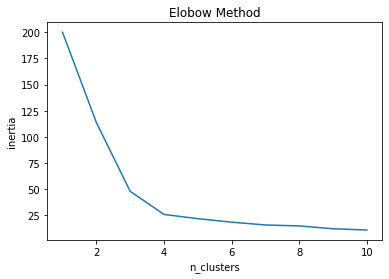

In [11]:
from sklearn.cluster import KMeans
inertia_list = []
for i in range(1, 11) : 
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_) # 각 지점으로부터 클러스터의 중심(centroid)까지의 거리의 제곱의 합
    
plt.plot(range(1, 11), inertia_list)
plt.title('Elobow Method')
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.show()

### 최적의 K(4) 값으로  KMeans 학습

In [14]:
K = 4 # 최적의 K값

In [15]:
kmeans = KMeans(n_clusters=K, random_state=0) # init='k-means++'
# kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X) # 학습을 하고 예측되는 값을 반환

In [16]:
y_kmeans

array([2, 3, 3, 0, 0, 1, 1, 0, 2, 0, 0, 3, 1, 3, 3, 0, 1, 2, 3, 0, 1, 0,
       3, 1, 2, 2, 3, 3, 3, 3, 1, 1, 3, 0, 2, 2, 3, 0, 0, 0, 3, 1, 2, 3,
       3, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 3, 1, 1, 2, 2, 2, 2, 1,
       1, 0, 1, 2, 3, 2, 2, 2, 3, 3, 3, 3, 0, 2, 1, 2, 1, 1, 2, 0, 3, 1,
       2, 3, 0, 1, 0, 2, 3, 2, 2, 0, 1, 3])

### 데이터 시각화 (최적의 K)

In [19]:
centers = kmeans.cluster_centers_ # 클러스터의 중심점 (centroid) 좌표
centers

array([[-0.57163957,  0.85415973],
       [ 0.8837666 , -1.26929779],
       [ 0.94107583,  0.93569782],
       [-1.22698889, -0.46768593]])

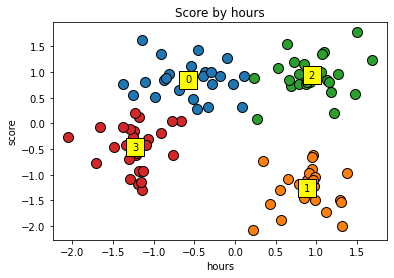

In [21]:
for cluster in range(K) : 
    plt.scatter(X[y_kmeans == cluster, 0], X[y_kmeans == cluster, 1], s=100, edgecolor='black') # 각 데이터
    plt.scatter(centers[cluster, 0], centers[cluster, 1], s=300, edgecolor='black', color='yellow', marker='s') # 중심점 네모
    plt.text(centers[cluster, 0], centers[cluster, 1], cluster, va='center', ha='center') # 클러스터 텍스트 출력

plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 데이터 시각화 (스케일링 원복)

In [22]:
X_org = sc.inverse_transform(X) # Feature Scaling 된 데이터를 다시 원복
X_org[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

In [24]:
centers_org = sc.inverse_transform(centers) # 중심점을 원복
centers_org

array([[ 3.96458333, 76.08333333],
       [ 7.8552    , 20.96      ],
       [ 8.0084    , 78.2       ],
       [ 2.21269231, 41.76923077]])

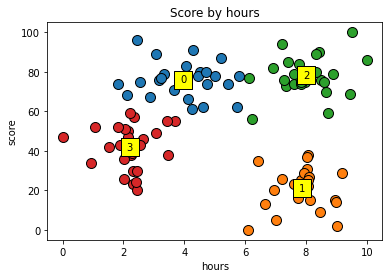

In [25]:
for cluster in range(K) : 
    plt.scatter(X_org[y_kmeans == cluster, 0], X_org[y_kmeans == cluster, 1], s=100, edgecolor='black') # 각 데이터
    plt.scatter(centers_org[cluster, 0], centers_org[cluster, 1], s=300, edgecolor='black', color='yellow', marker='s') # 중심점 네모
    plt.text(centers_org[cluster, 0], centers_org[cluster, 1], cluster, va='center', ha='center') # 클러스터 텍스트 출력

plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

0 그룹 : 공부시간이 적은데 점수가 높은 그룹  
1 그룹 : 공부시간이 많은데 점수가 낮은 그룹  
2 그룹 : 공부시간도 많고 점수도 높은 그룹  
3 그룹 : 공부시간도 적고 점수도 적은 그룹  

